In [1]:
!pwd

/c/Users/udhai/Documents/Flatiron/dsc-data-science-env-config/Project2_DAT/dsc-phase-2-project


In [3]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
preprocessed = pd.read_csv('data/preprocessed.csv', sep = ',', header=0)

In [6]:
preprocessed.head()

,Unnamed: 0,price_norm,sqft_living_norm,sqft_lot_norm,sqft_basement_norm,lat_norm,sqft_lot15_norm,Age_house_norm,long_norm,Renovation_1.0,...,zipcode_98199,view_1.0,view_2.0,view_3.0,view_4.0,bedrooms,floors,condition,yr_renovated,year_sold
0,0,-1.401997,-1.125564,-0.388490,-0.785188,-0.351390,-0.395502,0.646650,-0.305688,0,...,0,0,0,0,0,3,1.0,3,0.0,2014
1,1,0.279938,0.709416,-0.113302,1.112322,1.160045,-0.024341,0.711197,-0.746268,1,...,0,0,0,0,0,3,2.0,3,1991.0,2014
2,2,-1.799429,-2.131418,0.244426,-0.785188,1.281512,0.041983,0.971187,-0.135141,0,...,0,0,0,0,0,2,1.0,3,0.0,2015
3,3,0.499698,0.070561,-0.523969,1.372094,-0.282087,-0.545897,0.464305,-1.272122,0,...,0,0,0,0,0,4,1.0,5,0.0,2014
4,4,0.178433,-0.292847,0.008081,-0.785188,0.410186,-0.046448,-0.080492,1.200812,0,...,0,0,0,0,0,3,1.0,3,0.0,2015


In [9]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 89 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          21597 non-null  int64  
 1   price_norm          21597 non-null  float64
 2   sqft_living_norm    21597 non-null  float64
 3   sqft_lot_norm       21597 non-null  float64
 4   sqft_basement_norm  21597 non-null  float64
 5   lat_norm            21597 non-null  float64
 6   sqft_lot15_norm     21597 non-null  float64
 7   Age_house_norm      21597 non-null  float64
 8   long_norm           21597 non-null  float64
 9   Renovation_1.0      21597 non-null  int64  
 10  waterfront_1.0      21597 non-null  int64  
 11  zipcode_98002       21597 non-null  int64  
 12  zipcode_98003       21597 non-null  int64  
 13  zipcode_98004       21597 non-null  int64  
 14  zipcode_98005       21597 non-null  int64  
 15  zipcode_98006       21597 non-null  int64  
 16  zipc

In [8]:
preprocessed.groupby('waterfront_1.0').agg(['max', 'min', 'count', 'median', 'mean'])

Unnamed: 0                                   price_norm  \
                      max min  count   median          mean        max   
waterfront_1.0                                                           
0                   21596   0  21451  10798.0  10801.961447   5.333773   
1                   21560  49    146  10641.0  10215.965753   5.168974   

                                                     ... yr_renovated       \
                     min  count    median      mean  ...          max  min   
waterfront_1.0                                       ...                     
0              -3.387568  21451 -0.059269 -0.014084  ...       2015.0  0.0   
1              -0.926715    146  2.238361  2.069293  ...       2009.0  0.0   

                                         year_sold                       \
                count median        mean       max   min  count  median   
waterfront_1.0                                                            
0               21451    0.0   66.537644      2015  2014  21451  2014.0   
1                 146    0.0  395.013699      2015  2014    146  2014.0   

                             
                       mean  
waterfront_1.0               
0               2014.323155  
1               2014.294521  

[2 rows x 440 columns]

In [10]:
kc_house_df = pd.read_csv('data/cleaned_df.csv', sep = ',', header=0)

In [11]:
kc_house_df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [12]:
kc_house_df['Renovation_1.0'] = preprocessed['Renovation_1.0']

In [67]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
kc_house_df['price_sqft_living'] = kc_house_df.price / kc_house_df.sqft_living
kc_house_df['price_sqft_lot'] = kc_house_df.price / kc_house_df.sqft_lot
kc_house_df['price_sqft_above'] = kc_house_df.price / kc_house_df.sqft_above
kc_house_df['price_sqft_living15'] = kc_house_df.price / kc_house_df.sqft_living15
kc_house_df['price_sqft_lot15'] = kc_house_df.price / kc_house_df.sqft_lot15
kc_house_df.groupby(['zipcode', 'Renovation_1.0']).price_sqft_living.agg(['max', 'min', 'count', 'median', 'mean'])

max         min  count      median        mean
zipcode Renovation_1.0                                                       
98001   0               395.238095   88.698630    357  147.141345  151.080874
        1               218.750000  132.850242      4  174.571863  175.185992
98002   0               247.474747   87.588235    194  147.534785  151.545212
        1               158.450704  112.949791      5  138.805970  136.774595
98003   0               258.119658   88.150289    278  154.819246  157.128728
        1               174.757282  135.212273      2  154.984777  154.984777
98004   0               792.105263  241.573034    289  454.128440  474.497197
        1               718.390805  301.538462     28  485.919786  487.091364
98005   0               561.224490  148.750993    164  315.850678  313.875917
        1               450.892857  290.469925      4  348.721282  359.701337
98006   0               750.750751  126.404494    481  287.644788  296.770471
        1               645.161290  165.943878     17  301.587302  366.455243
98007   0               438.144330  139.150943    138  289.839400  290.155629
        1               317.142857  254.629630      3  289.473684  287.082057
98008   0               736.082474  130.890052    276  289.417249  299.133766
        1               781.990521  221.597633      7  367.469880  404.742535
98010   0               674.576271  106.012658     90  193.646131  206.490406
        1               634.615385  112.359551     10  220.642702  242.539903
98011   0               381.625442  140.353698    191  220.077220  225.570024
        1               323.214286  156.250000      4  252.969417  246.350780
98014   0               549.357798  119.230769    122  213.603006  224.407113
        1               148.076923  136.734694      2  142.405808  142.405808
98019   0               406.741573  101.145105    186  196.953661  202.850816
        1               244.186047  194.425926      4  201.265068  210.285527
98022   0               538.461538   88.083700    220  167.261905  182.596450
        1               233.333333  132.947977     13  158.878505  173.811356
98023   0               430.821918   88.815789    494  144.875614  148.422464
        1               356.037152  117.728532      5  162.222222  198.230607
98024   0               507.462687  106.410256     76  242.714646  252.655271
        1               281.914894  183.127572      4  259.688428  246.104831
98027   0               493.358634  126.333333    409  251.533742  251.910422
        1               225.848564  181.250000      3  215.000000  207.366188
98028   0               542.105263  129.801325    280  222.485358  225.683307
        1               202.485380  160.869565      3  161.458333  174.937760
98029   0               406.666667  184.986595    321  271.428571  272.068868
98030   0               254.629630   94.017094    255  152.173913  155.306220
        1               116.906475  116.906475      1  116.906475  116.906475
98031   0               493.246753   96.405229    272  157.150384  161.246608
        1               121.681416  121.681416      1  121.681416  121.681416
98032   0               283.132530   92.719298    123  146.205357  154.458847
        1               168.345324  110.655738      2  139.500531  139.500531
98033   0               725.000000  117.117117    414  321.484090  339.412369
        1               676.691729  231.474104     18  432.706767  431.312240
98034   0               781.170483  113.924051    542  255.946874  265.953589
        1               344.036697  181.528662      3  286.259542  270.608301
98038   0               468.750000   88.000000    580  170.690157  173.134554
        1               314.935065  131.578947      9  196.359517  211.980627
98039   0               770.491803  378.461538     41  565.359477  574.696524
        1               620.767494  432.835821      9  558.139535  538.837105
98040   0               790.816327  164.785847    253

In [75]:
gp3 = kc_house_df.groupby(['zipcode', 'Renovation_1.0']).price_sqft_living.agg(['max', 'min', 'count', 'median', 'mean']).reset_index()

In [77]:
gp3.columns

Index(['zipcode', 'Renovation_1.0', 'max', 'min', 'count', 'median', 'mean'], dtype='object')

In [104]:
gp3

,zipcode,Renovation_1.0,max,min,count,median,mean
0,98001,0,395.238095,88.698630,357,147.141345,151.080874
1,98001,1,218.750000,132.850242,4,174.571863,175.185992
2,98002,0,247.474747,87.588235,194,147.534785,151.545212
3,98002,1,158.450704,112.949791,5,138.805970,136.774595
4,98003,0,258.119658,88.150289,278,154.819246,157.128728
5,98003,1,174.757282,135.212273,2,154.984777,154.984777
6,98004,0,792.105263,241.573034,289,454.128440,474.497197
7,98004,1,718.390805,301.538462,28,485.919786,487.091364
8,98005,0,561.224490,148.750993,164,315.850678,313.875917
9,98005,1,450.892857,290.469925,4,348.721282,359.701337


In [111]:
gp3.columns.to_list()

['zipcode', 'Renovation_1.0', 'max', 'min', 'count', 'median', 'mean']

In [114]:
gp3.columns

Index(['zipcode', 'Renovation_1.0', 'max', 'min', 'count', 'median', 'mean'], dtype='object')

In [115]:
gp4 = pd.DataFrame(columns = gp3.columns.to_list())

for index, row in gp3.iterrows():
    if row['zipcode'] == (row + 1)['zipcode']:
        gp4[row] == gp3[row] and gp4[(row +1)] == gp3[(row +1)]
    else:
        continue
gp4.head()
        

,zipcode,Renovation_1.0,max,min,count,median,mean


In [116]:
gp4.shape

(0, 7)

In [87]:
gp4 = gp3[gp3['Renovation_1.0'] == 0]

<AxesSubplot:xlabel='zipcode', ylabel='mean'>

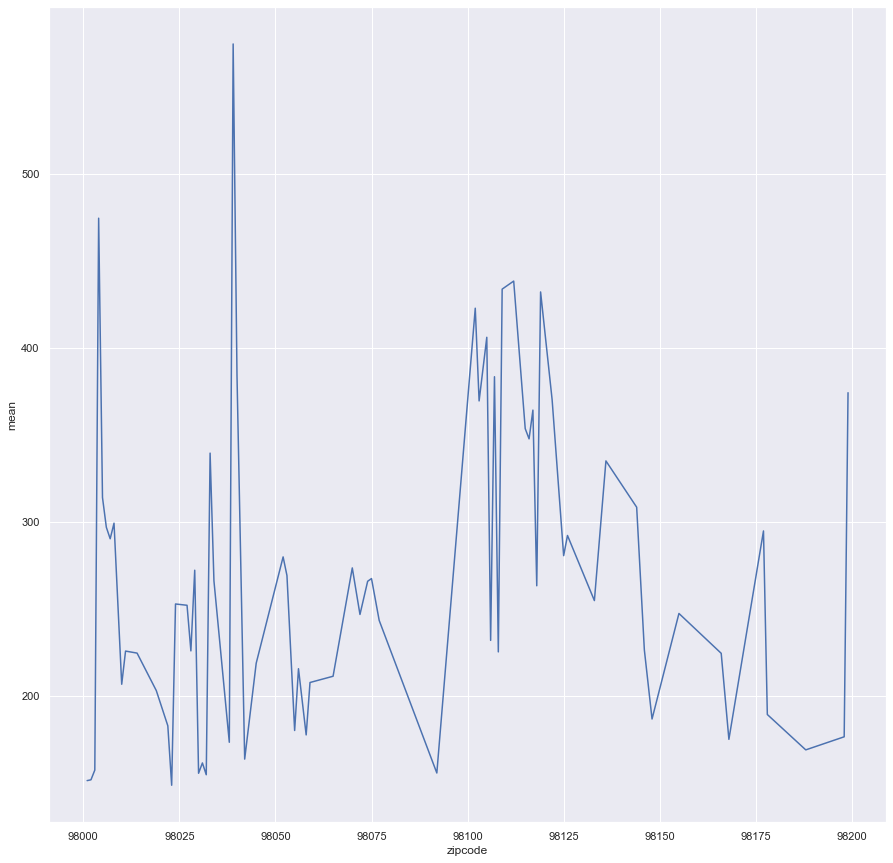

In [88]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.lineplot(x=(gp4['zipcode']), y=gp4['mean'])

In [89]:
gp5 = gp3[gp3['Renovation_1.0'] == 1]

C:\Users\udhai\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zipcode', ylabel='mean'>

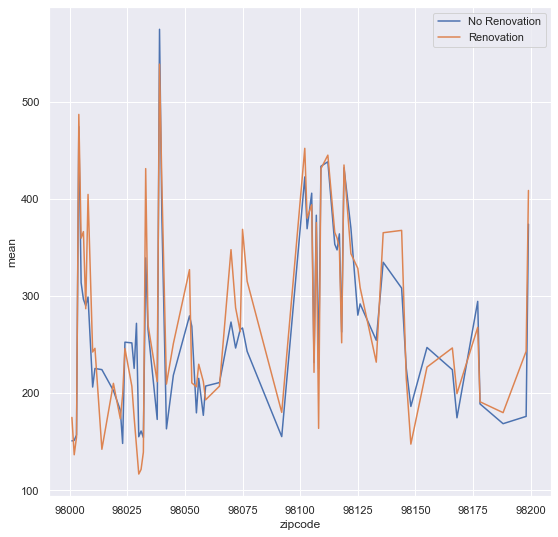

In [94]:
sns.set(rc = {'figure.figsize':(9,9)})
sns.lineplot(x=(gp4['zipcode']), y=gp4['mean'], label='No Renovation')
sns.lineplot(gp5['zipcode'], y=gp5['mean'], label = 'Renovation')

In [26]:
type(kc_house_df.groupby(['zipcode', 'Renovation_1.0', 'bedrooms']).agg(['max', 'min', 'count', 'median', 'mean']))

<ipython-input-26-85d2b2f35905>:1: FutureWarning: ['date', 'sqft_basement'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  type(kc_house_df.groupby(['zipcode', 'Renovation_1.0', 'bedrooms']).agg(['max', 'min', 'count', 'median', 'mean']))


pandas.core.frame.DataFrame

In [28]:
gp_zrb = kc_house_df.groupby(['zipcode', 'Renovation_1.0', 'bedrooms']).agg(['max', 'min', 'count', 'median', 'mean']).reset_index()

<ipython-input-28-9dce26bb9d32>:1: FutureWarning: ['date', 'sqft_basement'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  gp_zrb = kc_house_df.groupby(['zipcode', 'Renovation_1.0', 'bedrooms']).agg(['max', 'min', 'count', 'median', 'mean']).reset_index()


In [30]:
gp_zrb.head(10)

zipcode Renovation_1.0 bedrooms Unnamed: 0                        \
                                         max    min count   median   
0   98001              0        1      12817  12196     3  12197.0   
1   98001              0        2      17557    995    20   6754.0   
2   98001              0        3      21375    213   184  11477.5   
3   98001              0        4      21582     38   131  12914.0   
4   98001              0        5      21463   3864    18  11625.5   
5   98001              0        6      15120  15120     1  15120.0   
6   98001              1        2      20946   2163     2  11554.5   
7   98001              1        3      19244   5070     2  12157.0   
8   98002              0        1      10129   3801     3   5565.0   
9   98002              0        2      21071     18    19   6797.0   

                         id                                                \
           mean         max         min count        median          mean   
0  12403.333333  4031000520  3751600146     3  4.031001e+09  3.937867e+09   
1   7360.600000  9262800255   303000445    20  3.751603e+09  4.369546e+09   
2  10957.798913  9543000945   221049191   184  3.751602e+09  4.568125e+09   
3  12344.496183  9510930350   128500260   131  4.013800e+09  4.841530e+09   
4  12098.833333  9264450460   321049090    18  4.714800e+09  4.586619e+09   
5  15120.000000  3353400840  3353400840     1  3.353401e+09  3.353401e+09   
6  11554.500000  3354400060  1278000210     2  2.316200e+09  2.316200e+09   
7  12157.000000  8856004415  5729000080     2  7.292502e+09  7.292502e+09   
8   6498.333333  7335400215  1735800050     3  2.648500e+09  3.906567e+09   
9   8363.157895  8698600395    16000397    19  7.116500e+09  5.276265e+09   

      price                                          bathrooms              \
        max       min count    median           mean       max   min count   
0  227000.0  115000.0     3  166000.0  169333.333333      2.00  1.00     3   
1  415000.0  100000.0    20  207050.0  222175.000000      2.75  1.00    20   
2  625000.0  132500.0   184  239950.0  255413.402174      3.00  0.75   184   
3  850000.0  189950.0   131  299000.0  325339.625954      3.50  1.00   131   
4  500000.0  199900.0    18  299500.0  318516.166667      3.00  1.75    18   
5  230000.0  230000.0     1  230000.0  230000.000000      1.50  1.50     1   
6  238000.0  110000.0     2  174000.0  174000.000000      1.00  1.00     2   
7  465000.0  168000.0     2  316500.0  316500.000000      3.00  1.00     2   
8  142500.0   95000.0     3  112000.0  116500.000000      1.00  0.75     3   
9  330000.0  111300.0    19  189000.0  187162.368421      2.25  1.00    19   

                   sqft_living                                  sqft_lot  \
  median      mean         max   min count  median         mean      max   
0   2.00  1.666667        1150  1120     3  1150.0  1140.000000    17332   
1   1.00  1.425000        2056   770    20  1290.0  1356.850000   186872   
2   1.75  1.808424        3430   860   184  1600.0  1661.494565   142803   
3   2.50  2.360687        5440  1220   131  2160.0  2263.137405   239580   
4   2.50  2.402778        3860  1590    18  2443.5  2612.611111    64033   
5   1.50  1.500000        2140  2140     1  2140.0  2140.000000    36509   
6   1.00  1.000000        1088   828     2   958.0   958.000000     8453   
7   2.00  2.000000        2290  1150     2  1720.0  1720.000000    15600   
8   1.00  0.916667        1080   690     3   760.0   843.333333     6825   
9   1.00  1.276316        1700   720    19  1070.0  1182.157895    11954   

                                      floors                              \
     min count   median          mean    max  min count median      mean   
0   9812     3   9812.0  12318.666667    1.0  1.0     3   1.00  1.000000   
1   2064    20  19727.0  36913.500000    2.5  1.0    20   1.00  1.225000   
2   2231   184   9727.5  13981.266304    2.0  1.0   184   1.00  1.293478   
3   35

In [61]:
gp_2 = kc_house_df.groupby(['zipcode', 'Renovation_1.0', 'bedrooms'], as_index='zipcode').price.mean()
gp_2

zipcode  Renovation_1.0  bedrooms
98001    0               1           1.693333e+05
                         2           2.221750e+05
                         3           2.554134e+05
                         4           3.253396e+05
                         5           3.185162e+05
                         6           2.300000e+05
         1               2           1.740000e+05
                         3           3.165000e+05
98002    0               1           1.165000e+05
                         2           1.871624e+05
                         3           2.247264e+05
                         4           2.621252e+05
                         5           2.706000e+05
                         6           3.177500e+05
         1               3           2.166000e+05
                         4           2.443167e+05
98003    0               2           2.158935e+05
                         3           2.653772e+05
                         4           3.442539e+05
                

In [62]:
type(gp_2)

pandas.core.series.Series